# Derek McCrary
**Course**: CS 82B - Principles of Data Science
**Date**: May 18, 2025

## Module 7 Assignment

## Part 1: Review Code & Add Comments

### Code Overview
In sample code we will be using the LogisticRegressionCV algorithm and StandardScaler to build a classification model that predicts whether a passenger on the Titanic survived or not. We will be using the Titanic dataset, which contains information about passengers on the Titanic, including their age, gender, class, and whether they survived or not. You will preprocess the data, split it into training and testing sets, scale the data, train a logistic regression model using cross-validation, and evaluate the model's performance using precision, recall, and F1-score.


The Titanic dataset contains data about passengers on the Titanic, including their age, gender, class, and whether they survived or not. The dataset includes 891 rows and 12 columns, including the target variable "Survived", which indicates whether the passenger survived or not.

### The other features in the dataset include:

- Pclass: the passenger's class (1st, 2nd, or 3rd)
- Name: the passenger's name
- Sex: the passenger's gender
- Age: the passenger's age
- SibSp: the number of siblings or spouses on board
- Parch: the number of parents or children on board
- Ticket: the passenger's ticket number
- Fare: the price of the passenger's ticket
- Cabin: the passenger's cabin number
- Embarked: the port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
Evaluation Criteria
- Your submission will be evaluated on the following criteria:


Submit a clear and concise interpretation of the code added in the markdown comments.

In [1]:
# Install yellowbrick
!pip3 install yellowbrick
!pip install yellowbrick
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.1
    Uninstalling pip-25.1:
      Successfully uninstalled pip-25.1


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
#Read the titanic dataset
titanic = pd.read_csv('titanic.csv')

In [ ]:
# Remove columns that won't help prediction ('PassengerId', 'Name', 'Ticket', 'Cabin')
# Convert categorical variables 'Sex' and 'Embarked' to numeric using one-hot encoding
# Drop any rows with missing values
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
titanic = titanic.dropna()

In [ ]:
# Separate features (X) from target (y)
# Split the data into training (70%) and testing (30%) sets using a fixed random state for reproducibility
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize the features by removing the mean and scaling to unit variance
# Fit the scaler on training data and transform both training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a logistic regression model using 5-fold cross-validation
# This helps automatically select the best regularization strength
# and fits the model to the training data
clf = LogisticRegressionCV(cv=5, random_state=42)
clf.fit(X_train, y_train)

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_los

LogisticRegressionCV(cv=5, random_state=42)

In [8]:
# Use the trained model to predict survival on the test data
y_pred = clf.predict(X_test)

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [9]:
# Calculate precision, recall, and F1-score for the model's predictions
# These metrics help evaluate how well the model handles positive and negative cases
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.7307692307692307
Recall:  0.6404494382022472
F1 Score:  0.6826347305389222


/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/skle

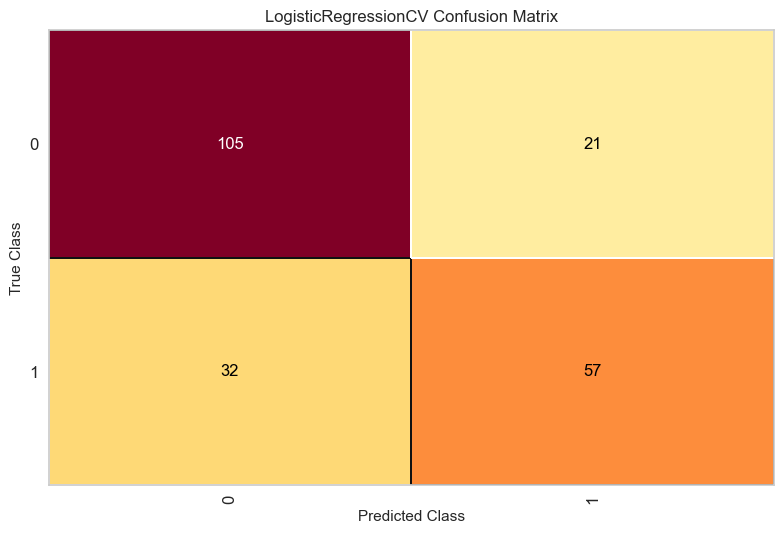

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [10]:
# Create and display a confusion matrix to visualize prediction performance
# Shows how many true/false positives and negatives the model produced
cm = ConfusionMatrix(clf, classes=[0,1])
cm.score(X_test, y_test)
cm.show()

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/skle

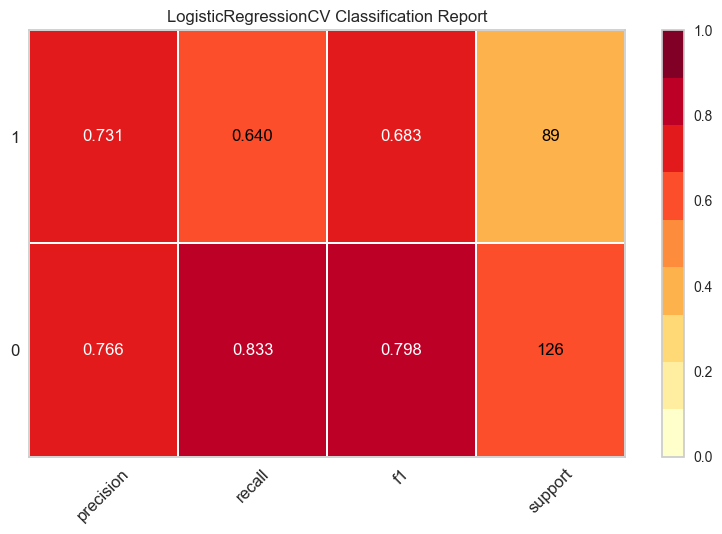

<Axes: title={'center': 'LogisticRegressionCV Classification Report'}>

In [11]:
# Generate a full classification report with precision, recall, F1-score, and support for each class
# Gives a more detailed view of model performance across both outcome classes
report = ClassificationReport(clf, classes=[0,1], support=True)
report.score(X_test, y_test)
report.show()

## Part 2: Your Turn

### Wine Dataset Classification using Logistic RegressionCV and StandardScaler
In this assignment, you will be using the LogisticRegressionCV algorithm and StandardScaler to build a classification model that can predict the wine class. You will be using the "Wine Data Set" from the sklearn library, which contains information about the chemical composition of wines grown in the same region in Italy. You will preprocess the data, split it into training and testing sets, scale the data, train a logistic regression model using cross-validation, and evaluate the model's performance using a classification report.

#### Dataset
The "Wine Data Set" contains data about the chemical composition of wines grown in the same region in Italy. The dataset includes 178 rows and 13 columns, including the target variable "target", which indicates the wine class.

#### The other features in the dataset include:

- alcohol: the alcohol content of the wine
- malic_acid: the malic acid content of the wine
- ash: the ash content of the wine
- alcalinity_of_ash: the alcalinity of ash of the wine
- magnesium: the magnesium content of the wine
- total_phenols: the total phenols content of the wine
- flavanoids: the flavanoids content of the wine
- nonflavanoid_phenols: the nonflavanoid phenols content of the wine
- proanthocyanins: the proanthocyanins content of the wine
- color_intensity: the color intensity of the wine
- hue: the hue of the wine
- od280/od315_of_diluted_wines: the OD280/OD315 of diluted wines
- proline: the proline content of the wine

The target variable "target" has three classes:

- Class 0: 59 instances
- Class 1: 71 instances
- Class 2: 48 instances

Requirements
- Load the dataset into a pandas DataFrame.
- Split the dataset into training and testing sets, with 70% of the data for training and 30% for testing.
- Scale the numerical features using StandardScaler.
- Train a logistic regression model using cross-validation (LogisticRegressionCV) on the training data. Use a 5-fold cross-validation, and set the regularization parameter C to a value of 1.
- Evaluate the performance of the model on the testing data using a classification report, which includes precision, recall, f1-score, and support for each class.
- Interpret the results of the model

In [12]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from yellowbrick.classifier import ClassificationReport

# Load the dataset into a pandas DataFrame
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: overflow encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: invalid value encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Volumes/DevDer

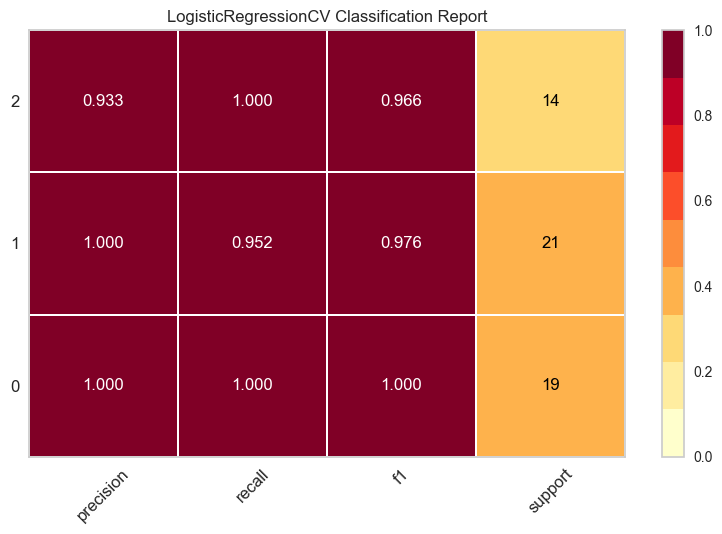

<Axes: title={'center': 'LogisticRegressionCV Classification Report'}>

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model using cross-validation
clf = LogisticRegressionCV(Cs=[1], cv=5, random_state=42)
clf.fit(X_train, y_train)

# Visualize precision, recall, and f1 scores using Yellowbrick
visualizer = ClassificationReport(clf, classes=[0, 1, 2], support=True)
visualizer.score(X_test, y_test)
visualizer.show()


In [15]:
# Preprocess the data
# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

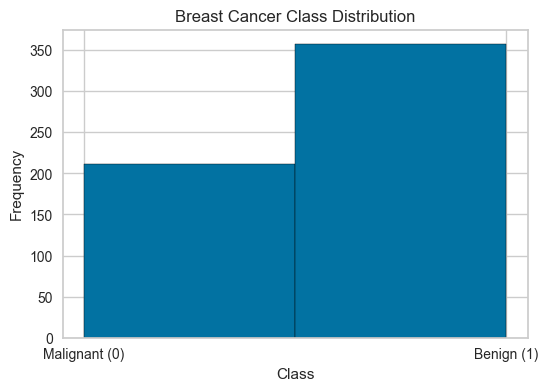

In [ ]:
#Visualize the class distribution
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
plt.hist(y, bins=2, edgecolor='black')
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])
plt.title('Breast Cancer Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

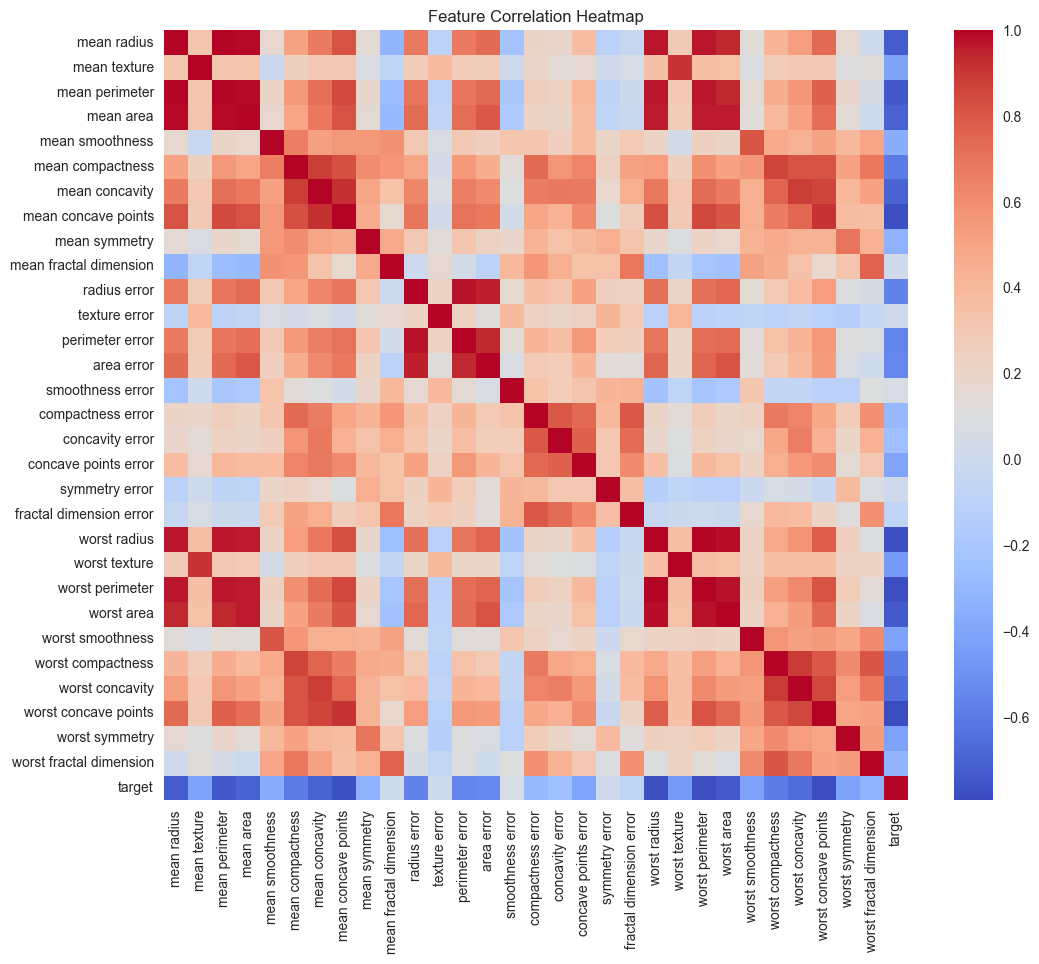

In [17]:
#Plot correlation heatmap
import pandas as pd
import seaborn as sns

# Convert to DataFrame for correlation
df_cancer = pd.DataFrame(X, columns=feature_names)
df_cancer['target'] = y

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_cancer.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

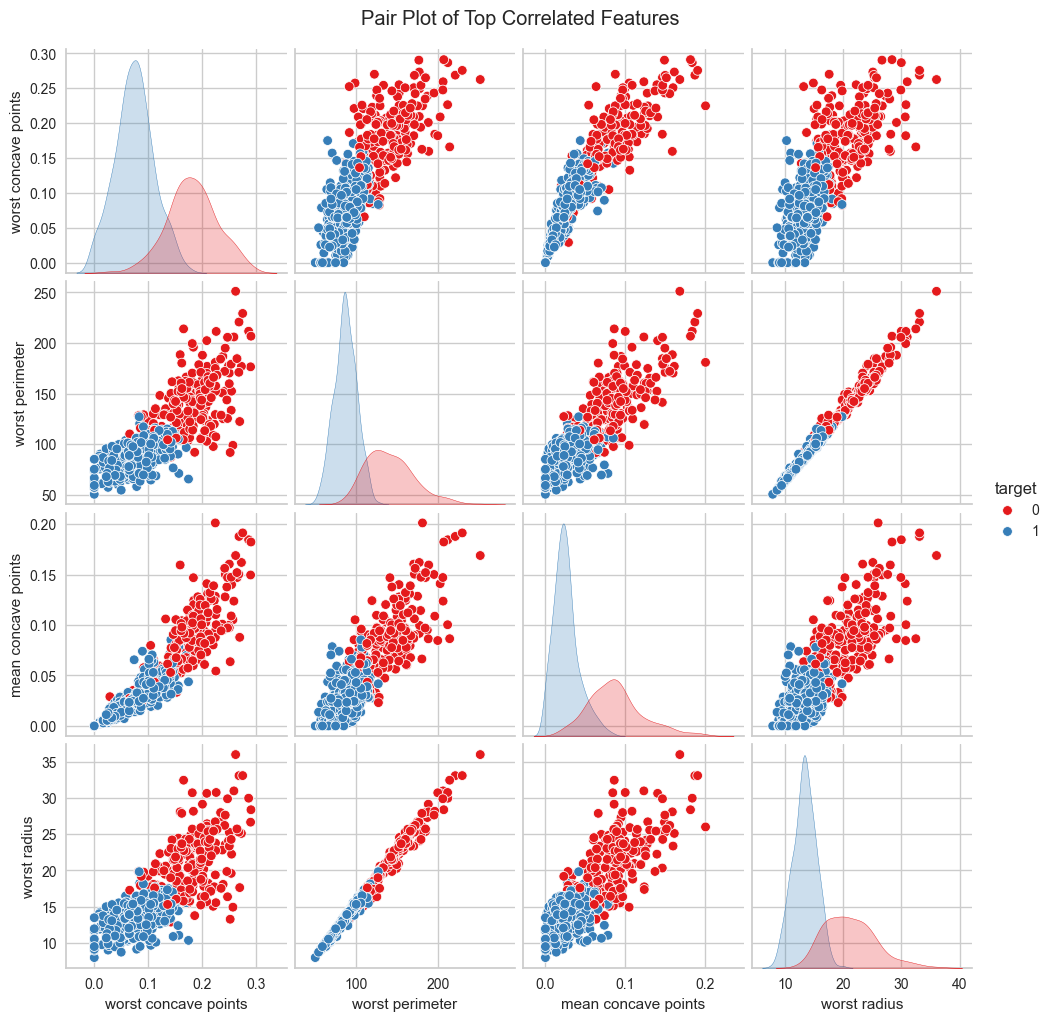

In [18]:
#Pair plot of top features
top_features = df_cancer.corr()['target'].abs().sort_values(ascending=False).index[1:5]

sns.pairplot(df_cancer, vars=top_features, hue='target', palette='Set1')
plt.suptitle('Pair Plot of Top Correlated Features', y=1.02)
plt.show()

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_linear_los

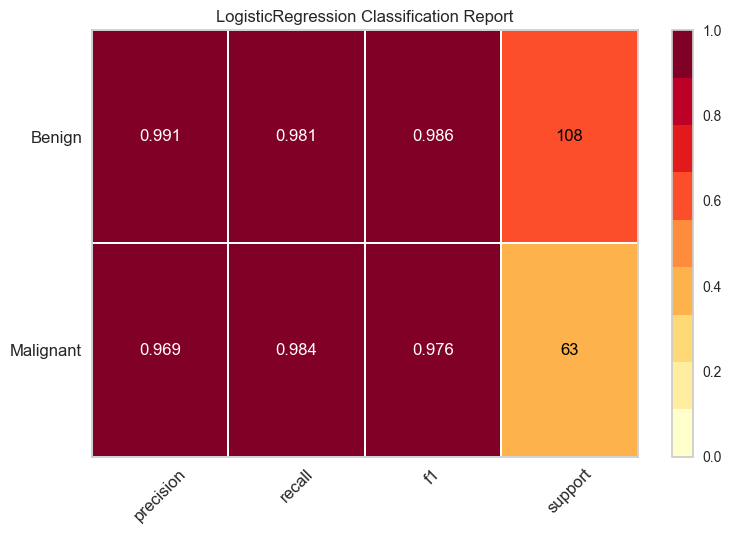

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


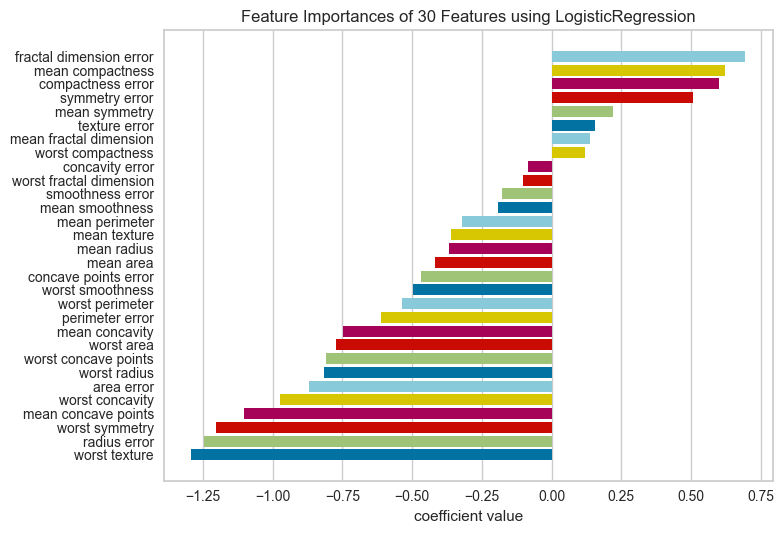

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/skle

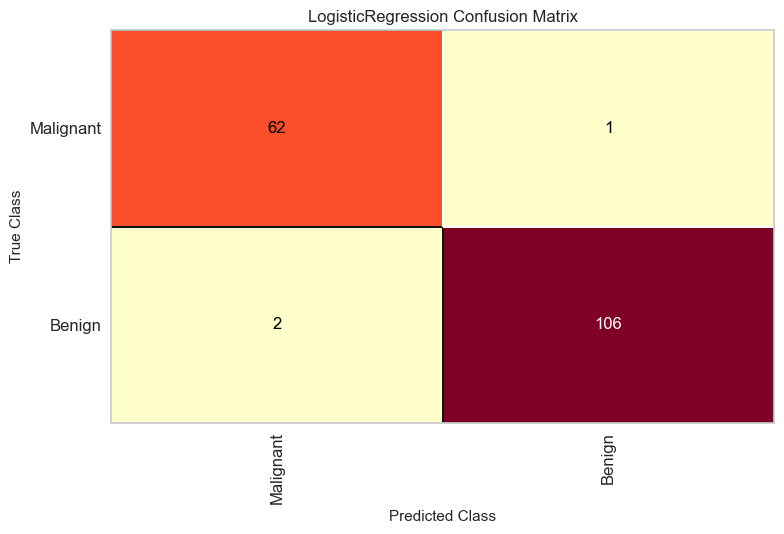

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [19]:
# -------------------------------
# Yellowbrick Visualizations for Breast Cancer Dataset
# -------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Classification report visualization
viz_report = ClassificationReport(model, classes=["Malignant", "Benign"], support=True)
viz_report.score(X_test_scaled, y_test)
viz_report.show()

# Feature importance visualization
viz_importance = FeatureImportances(model, labels=feature_names, relative=False)
viz_importance.fit(X_train_scaled, y_train)
viz_importance.show()

# Confusion matrix visualization
viz_cm = ConfusionMatrix(model, classes=["Malignant", "Benign"])
viz_cm.score(X_test_scaled, y_test)
viz_cm.show()